## Tất Cả Những Gì Ta Cần Là Phương Pháp Hồi quy

Khi thực hiện suy luận nhân quả, chúng ta đã biết làm thế nào mà có hai kết quả tiềm năng cho mỗi cá thể: \\(Y_0\\) là kết quả xảy ra nếu cá thể đó không nhận can thiệp và \\(Y_1\\) là kết quả nếu cá thể này nhận can thiệp. Việc chỉ định giá trị can thiệp là 0 hoặc 1 sẽ hiện thực hoá một trong hai kết quả tiềm năng, khiến chúng ta không thể nào biết được kết quả còn lại. Như vậy, thực tế chúng ta không thể biết được tác động can thiệp của cá thể \\(\tau_i = Y_{1i} - Y_{0i}\\). 

$
Y_i = Y_{0i} + T_i(Y_{1i} - Y_{0i}) = Y_{0i}(1-T_i) + T_i Y_{1i}
$

Vì vậy, trong lúc này, chúng ta hãy tập trung vào nhiệm vụ đơn giản hơn trong việc ước lượng tác động nhân quả trung bình. Nắm rõ điều này, chúng ta chấp nhận thực tế rằng một số người phản ứng tốt hơn với can thiệp, nhưng ta cũng không thể nào biết họ là ai. Thay vào đó, chúng ta sẽ chỉ thử xem liệu sự can thiệp này, **tính bình quân**, có hiệu quả hay không.

$
ATE = E[Y_1 - Y_0]
$

Bằng cách này ta sẽ có một mô hình giản lược, với một tác động can thiệp không đổi \\(Y_{1i} = Y_{0i} + \kappa\\). Nếu \\(\kappa\\) có giá trị dương, ta sẽ nói rằng sự can thiệp, **tính bình quân**, có một tác động dương. Ngay cả khi có một số người phản ứng không tốt với sự can thiệp, thì bình quân, tác động trên vẫn sẽ là tích cực.

Hãy nhớ lại rằng chúng ta không thể chỉ đơn giản ước lượng \\(E[Y_1 - Y_0]\\) bằng cách tính sự khác biệt về giá trị trung bình \\(E[Y|T=1] - E[Y|T=0]\\) do có thiên lệch. Thiên lệch thường nảy sinh khi có sự khác biệt giữa nhóm được can thiệp và nhóm đối chứng, ngoài khác biệt về việc nhận can thiệp. Một cách để nhận biết là xem xét sự khác biệt của kết quả tiềm năng \\(Y_0\\)

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{E[Y_0|T=1] - E[Y_0|T=0]\}}_{THIÊN LỆCH}
$

Trước đó, chúng ta đã biết làm thế nào để loại trừ thiên lệch bằng phương pháp Thử Nghiệm Ngẫu Nhiên, hay thường được biết đến với tên gọi **Thử Nghiệm Ngẫu Nhiên Có Đối Chứng**. RCT bắt buộc các nhóm được can thiệp và nhóm đối chứng phải tương đồng và đó cũng chính là lý do vì sao mà thiên lệch lại bị tiêu biến. Chúng ta cũng đã biết cách thiết lập các mức độ không chắc chắn xung quanh các ước lượng cho tác động can thiệp. Cụ thể, chúng ta đã xem xét trường hợp của lớp học trực tuyến so với lớp học truyền thống, trong đó \\(T = 0\\) đại diện cho nhóm học sinh theo phương pháp học truyền thống và \\(T = 1\\) đại diện cho nhóm học sinh tham gia các lớp trực tuyến. Học sinh được chỉ định ngẫu nhiên vào một trong hai phương pháp học đó và sau đó, kết quả học tập của chúng được đánh giá qua một kỳ thi. Chúng ta đã xây dựng một hàm kiểm định A/B mà có thể so sánh cả hai nhóm, ước lượng tác động can thiệp trung bình và thậm chí thiết lập khoảng tin cậy xung quanh kết quả đó.

Bây giờ, đây chính là lúc chúng ta có thể làm tất cả những điều trên với phương pháp của suy luận nhân quả: **Hồi Quy Tuyến Tính**! Hãy nghĩ theo hướng này. Nếu việc so sánh nhóm được can thiệp và nhóm đối chứng là một quả táo để dùng cho món tráng miệng, thì hồi quy tuyến tính chính là một chiếc tiramisu béo ngậy và mát lạnh. Hoặc nếu việc so sánh nhóm được can thiệp và nhóm đối chứng là một chiếc bánh mì gối Wonder Bread lâu ngày và nhạt nhẽo, thì hồi quy tuyến tính sẽ là một ổ bánh mì lên men vỏ giòn và xốp được nướng bởi chính bàn tay của Chad Robertson.

![img](./data/img/linear-regression/you_vs.png)

Hãy xem cách mà phương pháp này vận hành. Trong đoạn code dưới đây, chúng tôi muốn thực hiện cùng một phân tích về việc so sánh các lớp học trực tuyến và truyền thống. Nhưng thay vì làm tất cả những phép toán về khoảng tin cậy, chúng tôi chỉ chạy một hồi quy. Cụ thể hơn, chúng tôi ước lượng mô hình sau:

$
exam_i = \beta_0 + \kappa \ Online_i + u_i
$

Lưu ý rằng biến \\(Online\\) chính là sự biểu thị can thiệp và do đó, là một biến giả. Nó có giá trị 0 khi sự can thiệp là lớp học truyền thống và 1 nếu là lớp học trực tuyến. Điều này cho thấy hồi quy tuyến tính sẽ cho biết \\(E[Y|T=0] = \beta_0\\) và \\(E[Y|T=1] = \beta_0 + \kappa \\). \\(\kappa\\) sẽ là ATE.


In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import graphviz as gr
%matplotlib inline

data = pd.read_csv("data/online_classroom.csv").query("format_blended==0")
result = smf.ols('falsexam ~ format_ol', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,78.5475,1.113,70.563,0.000,76.353,80.742
format_ol,-4.9122,1.680,-2.925,0.004,-8.223,-1.601


Tuyệt thật. Chúng ta không những có thể ước lượng được ATE, mà còn tính được các thông số khoảng tin cậy và Trị Số P một cách dễ dàng. Hơn thế nữa, chúng ta có thể thấy hồi quy đang thực hiện chính xác những gì ta mong đợi: so sánh \\(E[Y|T=0]\\) và \\(E[Y|T=1]\\). Hệ số chặn cũng chính là trung bình của mẫu khi \\(T=0\\), \\(E[Y|T=0]\\), và hệ số góc của lớp học trực tuyến cũng chính xác là chênh lệch mẫu giữa các giá trị trung bình  \\(E[Y|T=1] - E[Y|T=0]\\). Nếu vẫn còn hoài nghi, không thành vấn đề. Bạn có thể tự mình kiểm tra:

In [24]:
(data
 .groupby("format_ol")
 ["falsexam"]
 .mean())

format_ol
0    78.547485
1    73.635263
Name: falsexam, dtype: float64

Như kỳ vọng. Nếu ta cộng ATE vào hệ số chặn, đấy chính là ước lượng hệ số của định dạng trực tuyến, ta sẽ có trung bình của mẫu cho nhóm được can thiệp: \\(78.5475 + (-4.9122) = 73.635263\\).

## Lý Thuyết Hồi quy

Tôi không định đào sâu vào cách mà hồi quy tuyến tính được xây dựng và ước lượng, nhưng một chút lý thuyết sẽ giúp chúng ta giải thích sức mạnh của phương pháp hồi quy trong suy luận nhân quả. Đầu tiên, hồi quy giải quyết bài toán dự đoán tuyến tính tối ưu. Gọi \\(\beta^*\\) là một véc-tơ của các tham số:

$
\beta^* =\underset{\beta}{argmin} \ E[(Y_i - X_i'\beta)^2]
$


Nếu ta lấy vi phân giá trị của nó và gán giá trị bằng 0, lời giải cho bài toán này được tính bằng

$
\beta^* = E[X_i'X_i]^{-1}E[X_i' Y_i]
$

Chúng ta có thể ước lượng beta bằng cách sử dụng mẫu dữ liệu theo công thức:

$
\hat{\beta} = (X'X)^{-1}X' Y
$

Nhưng cũng chớ cả tin. Nếu các bạn hiểu code tốt hơn công thức, hãy tự mình tìm hiểu thử xem:

In [25]:
X = data[["format_ol"]].assign(intercep=1)
y = data["falsexam"]

def regress(y, X): return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

beta = regress(y, X)
beta

array([-4.9122215 , 78.54748458])

Các công thức trên khá là chung chung. Tuy nhiên, nó đáng để nghiên cứu trường hợp khi chúng ta chỉ có một biến hồi quy. Đối với suy luận nhân quả, chúng ta thường muốn ước lượng tác động nhân quả của một biến \\(T\\) đối với một kết quả \\(y\\). Vì vậy, chúng ta sử dụng hồi quy đơn biến để ước lượng tác động. Ngay cả khi ta thêm các biến khác vào mô hình, chúng thường cũng chỉ là các biến bổ trợ. Việc thêm các biến khác có thể hỗ trợ ta ước lượng tác động nhân quả của can thiệp, nhưng chúng ta lại không quan tâm lắm đến việc ước lượng các tham số này. 

Với một biến hồi quy duy nhất \\(T\\), tham số của biến này được biểu diễn bởi

$
\beta_1 = \dfrac{Cov(Y_i, T_i)}{Var(T_i)} 
$

Nếu \\(T\\) được chỉ định ngẫu nhiên, \\(\beta_1\\) chính là ATE.

In [26]:
kapa = data["falsexam"].cov(data["format_ol"]) / data["format_ol"].var()
kapa

-4.912221498226952

Nếu chúng ta có nhiều hơn một biến hồi quy, ta có thể triển khai theo công thức dưới đây để biểu diễn. Giả sử các biến khác chỉ là các biến bổ trợ và ta thực sự chỉ quan tâm đến việc ước lượng tham số \\(\kappa\\) của biến \\(T\\).

$
y_i = \beta_0 + \kappa T_i + \beta_1 X_{1i} + ... +\beta_k X_{ki} + u_i
$

\\(\kappa\\) có thể được biểu diễn bởi công thức sau

$
\kappa = \dfrac{Cov(Y_i, \tilde{T_i})}{Var(\tilde{T_i})} 
$

Trong đó, \\(\tilde{T_i}\\) là phần dư từ việc hồi quy tất cả các biến giải thích khác \\(X_{1i} + ... + X_{ki}\\) trên \\(T_i\\). Bây giờ thì ta sẽ thấy nó hay ho như thế nào. Có nghĩa là hệ số góc của một hồi quy đa biến là hệ số góc trong mô hình hồi quy đơn biến của cùng một biến hồi quy sau khi tính đến tác động của các biến khác trong mô hình. Trong phạm trù suy luận nhân quả, \\(\kappa\\) là hệ số góc của \\(T\\) trong mô hình đơn biến sau khi được dự đoán bởi tất cả các biến khác.

Công thức này có ý nghĩa như sau. Nếu ta có thể dự đoán \\(T\\) bằng các biến khác, điều này có nghĩa là nó không ngẫu nhiên. Tuy nhiên, ta có thể làm cho \\(T\\) gần như ngẫu nhiên một khi ta kiểm soát được các biến khác. Để làm được như vậy, ta sử dụng hồi quy tuyến tính nhằm dự đoán \\(T\\) bằng cách sử dụng các biến khác, và sau đó ta lấy phần dư của hồi quy vừa thực hiện \\(\tilde{T}\\). Theo định nghĩa, \\(\tilde{T}\\) không thể được dự đoán bởi các biến \\(X\\) mà chúng ta đã sử dụng để dự đoán \\(T\\). Nói một cách hoa mỹ thì \\(\tilde{T}\\) chính là một phiên bản của sự can thiệp mà không liên quan đến bất kỳ biến \\(X\\) nào khác.

Nhân tiện, tính chất này cũng là một đặc trưng của hồi quy tuyến tính. Phần dư luôn trực giao hoặc không tương quan với bất kỳ biến nào trong cùng mô hình:

In [27]:
e = y - X.dot(beta)
print("Sự trực giao diễn ra khi tích vô hướng bằng 0:", np.dot(e, X))
X[["format_ol"]].assign(e=e).corr()

Sự @@orthogonality@@ diễn ra khi @@dot product@@ bằng 0: [-5.54223334e-13 -1.84741111e-12]


,format_ol,e
format_ol,1.000000e+00,1.963734e-16
e,1.963734e-16,1.000000e+00


Và điều thú vị hơn nữa là những đặc tính này không phụ thuộc vào bất cứ điều gì! Chúng là những sự thật mang tính toán học, bất kể dữ liệu đó trông như thế nào.

## Hồi quy Cho Dữ Liệu Không Ngẫu Nhiên

Cho đến nay, chúng ta đã làm việc với dữ liệu thử nghiệm ngẫu nhiên, nhưng như chúng ta biết, những dữ liệu đó rất khó có được. Các thí nghiệm rất tốn kém để tiến hành hoặc đơn giản là không khả thi. Rất khó để thuyết phục McKinsey & Co. cung cấp dịch vụ miễn phí một cách ngẫu nhiên để chúng ta có thể được một lần xác định giá trị mà dịch vụ tư vấn của họ mang lại, thực tế là những công ty có đủ khả năng chi trả cho dịch vụ này cũng đã rất sộp rồi.

Vì vậy, bây giờ chúng ta sẽ đi sâu vào dữ liệu không ngẫu nhiên hoặc dữ liệu quan sát. Trong ví dụ sau, chúng ta sẽ cố gắng ước lượng tác động của việc tăng thêm một năm học vấn đối với mức lương theo giờ. Bạn biết đấy, thật khó để tiến hành một thử nghiệm với giáo dục. Bạn không thể chỉ đơn giản chọn ngẫu nhiên bất kỳ ai vào hệ thống giáo dục có 4, 8 hoặc 12 năm học.

Trước hết, hãy ước lượng một mô hình thật đơn giản. Chúng ta sẽ hồi quy hàm log của tiền lương theo giờ trên số năm học vấn. Chúng ta sử dụng log để tham số ước lượng của số giờ có thể được diễn giải theo phần trăm. Bằng cách này, chúng ta có thể diễn giải rằng tăng thêm một năm học vấn sẽ tăng mức lương theo giờ thêm x%.

$
log(hwage)_i = \beta_0 + \beta_1 educ_i + u_i
$

In [28]:
wage = pd.read_csv("./data/wage.csv").dropna()
model_1 = smf.ols('np.log(wage) ~ educ', data=wage).fit()
model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.9995,0.094,63.640,0.000,5.814,6.185
educ,0.0596,0.007,8.757,0.000,0.046,0.073


Giá trị ước lượng được của \\(\beta_1\\) là 0.0529, với khoảng tin cậy 95% nằm trong khoảng (0.040, 0.066). Có nghĩa là mô hình này dự đoán mức lương sẽ tăng khoảng 5.3% cho mỗi năm học tăng thêm. Phần trăm tăng đồng nghĩa với việc số năm học vấn có tác động đến mức lương theo cấp số nhân: chúng tôi kỳ vọng rằng việc học từ 8 đến 9 năm sẽ có giá trị hơn là chỉ học từ 2 đến 3 năm.

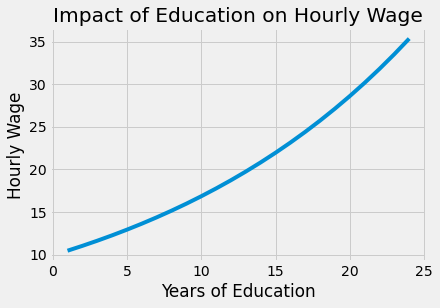

In [29]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

x = np.array(range(1, 25))
plt.plot(x, np.exp(2.2954 + 0.0529 * x))
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage")
plt.title("Impact of Education on Hourly Wage")
plt.show()

Tất nhiên, không phải vì chúng ta có thể ước lượng mô hình đơn giản này mà nó chính xác. Hãy để ý cách mà tôi đã cẩn trọng khi nói rằng mô hình trên **dự đoán** mức lương theo số năm học vấn. Tôi chưa bao giờ nói rằng dự đoán này là nhân quả. Trên thực tế, cho đến thời điểm hiện tại, các bạn có thể đã có những lý do thật sự nghiêm túc để tin rằng mô hình này bị thiên lệch. Vì dữ liệu của chúng tôi không đến từ một thử nghiệm ngẫu nhiên, nên chúng tôi không biết liệu những người có thời gian học tập lâu hơn có tương đồng với những người có ít thời gian học tập hơn hay không. Hơn nữa, từ sự hiểu biết của chúng tôi về cách thế giới vận hành, chúng tôi chắc rằng chúng không thể nào tương đồng được. Cụ thể, chúng ta có thể lập luận rằng những người có nhiều năm học vấn có thể có bố mẹ giàu hơn, và việc tăng lương mà chúng ta thấy khi tăng số năm học vấn chỉ là sự phản ánh mối quan hệ giữa sự giàu có của gia đình và số năm được giáo dục. Khi biểu diễn bằng các công thức toán học, ta thấy rằng \\(E[Y_0|T=0] < E[Y_0|T=1]\\), nghĩa là, những người có nhiều số năm học vấn vẫn sẽ có được thu nhập cao hơn ngay cả khi họ chỉ đi học trong một thời gian ngắn. Nếu bạn thực sự có thành kiến về giáo dục, bạn có thể lập luận rằng giáo dục thậm chí có thể làm *giảm* mức lương thu nhập bằng cách cản trở mọi người tham gia vào lực lượng lao động và giảm kinh nghiệm làm việc của họ.

May thay, chúng ta có quyền truy cập vào rất nhiều các biến khác trong dữ liệu. Chúng ta có thể thấy trình độ học vấn của cha mẹ `meduc`, `feduc`, chỉ số `IQ` của người đó, số năm kinh nghiệm `exper` và số năm vào biên chế trong công ty hiện tại `tenure`. Chúng ta thậm chí còn có một số biến giả cho tình trạng hôn nhân và người da màu.

In [30]:
wage.head()

,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
0,769,40,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0
2,825,40,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0
3,650,40,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0
4,562,40,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0
6,600,40,2.708050,91,10,13,0,30,0,0,0,1,1,2.0,8.0,8.0


Chúng ta có thể đưa tất cả các biến bổ sung đó vào một mô hình và ước lượng:

$
log(hwage)_i = \beta_0 + \kappa \ educ_i + \pmb{\beta}X_i + u_i
$

Để hiểu được biện pháp trên giúp giải quyết vấn đề thiên lệch như thế nào, hãy tóm tắt lại việc hồi quy đơn biến có thể tạo nên hồi quy đa biến như thế nào.

$
\kappa = \dfrac{Cov(Y_i, \tilde{T_i})}{Var(\tilde{T_i})} 
$

Công thức này nói rằng chúng ta có thể dự đoán `educ` từ trình độ học vấn của cha mẹ, chỉ số IQ, và kinh nghiệm làm việc, v.v. Sau khi thực hiện xong, chúng ta sẽ chỉ còn lại một phiên bản của `educ`, \\(\tilde{educ}\\), không tương quan với tất cả các biến khác. Điều này sẽ phá vỡ các lập luận như "những người có nhiều số năm học vấn hơn vì họ có chỉ số IQ cao hơn. Vì vậy, không phải do số năm học vấn giúp cải thiện mức lương. Thay vào đó, nó chỉ tương quan với chỉ số IQ, điều mà thúc đẩy mức lương được nhận". Chà, nếu chúng ta đưa IQ vào trong mô hình, thì \\(\kappa\\) sẽ trở thành thu nhập khi tăng thêm một năm học trong khi giữ cho biến IQ cố định. Chúng ta hãy tạm dừng một chút để ngẫm xem kết quả này có ngụ ý gì. Ngay cả khi chúng ta không thể sử dụng các thử nghiệm ngẫu nhiên có đối chứng để giữ cho các yếu tố khác tương đồng giữa nhóm được can thiệp và nhóm đối chứng, phương pháp hồi quy có thể thực hiện điều này bằng cách đưa các yếu tố trên vào trong mô hình, ngay cả khi dữ liệu không phải ngẫu nhiên!

In [31]:
controls = ['IQ', 'exper', 'tenure', 'age', 'married', 'black',
            'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']

X = wage[controls].assign(intercep=1)
t = wage["educ"]
y = wage["lhwage"]

beta_aux = regress(t, X)
t_tilde = t - X.dot(beta_aux)

kappa = t_tilde.cov(y) / t_tilde.var()
kappa

0.04114719101005263

Hệ số góc mà chúng ta vừa ước lượng cho thấy đối với những người có cùng chỉ số IQ, kinh nghiệm làm việc, số năm vào biên chế, tuổi tác, v.v., chúng ta kỳ vọng rằng việc tăng thêm một năm học vấn tương quan với mức tăng 4,11% của tiền lương theo giờ. Điều này khẳng định sự nghi ngờ của chúng tôi rằng mô hình đầu tiên chỉ với biến `educ` bị thiên lệch. Nó cũng khẳng định rằng thiên lệch này đã ước lượng quá tác động của giáo dục. Một khi chúng ta kiểm soát được các yếu tố khác, tác động được ước lượng trước đó của giáo dục sẽ giảm xuống.

Nếu chúng ta khôn ngoan hơn và sử dụng phần mềm đã được viết sẵn thay vì tự mình làm mọi thứ, ta có thể thiết lập một khoảng tin cậy xung quanh ước lượng này.

In [32]:
model_2 = smf.ols('lhwage ~ educ +'+"+".join(controls), data=wage).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1156,0.232,4.802,0.000,0.659,1.572
educ,0.0411,0.010,4.075,0.000,0.021,0.061
IQ,0.0038,0.001,2.794,0.005,0.001,0.006
exper,0.0153,0.005,3.032,0.003,0.005,0.025
tenure,0.0094,0.003,2.836,0.005,0.003,0.016
age,0.0086,0.006,1.364,0.173,-0.004,0.021
married,0.1795,0.053,3.415,0.001,0.076,0.283
black,-0.0801,0.063,-1.263,0.207,-0.205,0.044
south,-0.0397,0.035,-1.129,0.259,-0.109,0.029
urban,0.1926,0.036,5.418,0.000,0.123,0.262


## Biến Thiếu Hay Là Thiên Lệch Nhiễu

Câu hỏi vẫn chưa có lời giải đáp là: tham số mà chúng ta đã ước lượng có quan hệ nhân quả không? Thật không may, chúng tôi không thể nói một cách chắc chắn được. Chúng ta có thể lập luận rằng mô hình đơn giản ban đầu hồi quy tiền lương theo số năm học vấn có lẽ không phải quan hệ nhân quả. Nó thiếu các biến quan trọng có tương quan với cả số năm học vấn và tiền lương. Nếu không kiểm soát chúng, tác động ước lượng được của giáo dục cũng bao gồm tác động của những biến khác không được đưa vào mô hình.

Để hiểu rõ hơn về thiên lệch này, hãy giả sử mô hình thực về cách mà giáo dục tác động đến tiền lương có dạng như sau

$
Wage_i = \alpha + \kappa \ Educ_i + A_i'\beta + u_i
$

mức lương bị tác động bởi trình độ học vấn, được đo bằng kích thước của \\(\kappa\\) và bởi các yếu tố về năng lực, được biểu thị bởi véc-tơ \\(A\\). Nếu chúng ta thiếu yếu tố năng lực trong mô hình, thông số ước lượng của \\(\kappa\\) sẽ có dạng:

$
\dfrac{Cov(Wage_i, Educ_i)}{Var(Educ_i)} = \kappa + \beta'\delta_{Ability}
$

trong đó \\(\delta_{A}\\) là véc-tơ của các hệ số góc từ việc hồi quy \\(A\\) theo \\(Educ\\)

Đây không phải chính xác là \\(\kappa\\) mà ta muốn. Thay vào đó, nó còn có thêm \\(\beta'\delta_{A}\\). Đây chính là tác động của biến thiếu \\(A\\) đến \\(Wage\\), \\(\beta\\) nhân với tác động của biến thiếu lên biến \\(Educ\\). Điều này quan trọng đối với các chuyên gia kinh tế đến nỗi Joshua Angrist đã làm một câu châm ngôn về nó để sinh viên có thể nghiền ngẫm:

```
"Hồi quy thiếu bằng hồi quy đủ cộng với tác động của biến thiếu nhân với hồi quy của biến thiếu trên các biến được đưa vào mô hình"
```

Tại đây, hồi quy thiếu chính là hồi quy khi thiếu các biến, trong khi hồi quy đủ lại kết hợp chúng vào. Công thức hay câu thần chú này cho chúng ta cái nhìn sâu sắc hơn về bản chất của thiên lệch. Đầu tiên, thiên lệch sẽ bằng 0 nếu các biến thiếu không có tác động đến biến phụ thuộc \\(Y\\). Điều này hoàn toàn có lý. Ta không cần phải kiểm soát những thứ không liên quan đến tiền lương khi cố gắng hiểu tác động của số năm học vấn đối với nó. Hai là, thiên lệch cũng sẽ bằng 0 nếu các biến thiếu không có tác động đến biến can thiệp. Điều này cũng có ý nghĩa trực quan. Nếu tất cả mọi yếu tố tác động đến giáo dục đều đã được đưa vào mô hình, thì sẽ không có chuyện tác động ước lượng được của giáo dục bị trộn lẫn với quan hệ tương quan từ giáo dục lên một yếu tố khác chi phối tiền lương.

![img](data/img/linear-regression/confused_cat.png)

Nói một cách ngắn gọn hơn, chúng ta nói rằng **sẽ không có OVB nếu tất cả các biến nhiễu được đưa vào trong mô hình**. Chúng ta cũng có thể tận dụng kiến thức của mình về đồ thị nhân quả tại đây. Một biến nhiễu là biến **chi phối cả sự can thiệp và kết quả**. Trong ví dụ về tiền lương, IQ là một biến nhiễu. Những người có chỉ số IQ cao thường có xu hướng theo đuổi nhiều năm học hơn vì điều đó dễ dàng hơn đối với họ, vì vậy chúng ta có thể nói rằng chỉ số IQ là yếu tố tác động lên trình độ học vấn. Những người có chỉ số IQ cao cũng có xu hướng tự nhiên là làm việc năng suất hơn và do đó có mức lương cao hơn, vì vậy chỉ số IQ cũng tác động lên mức lương. Vì các biến nhiễu là các biến tác động đến cả sự can thiệp và kết quả, chúng tôi đánh dấu chúng bằng mũi tên đi tới T và Y. Tại đây, tôi đã ký hiệu chúng bằng \\(W\\). Tôi cũng đã đánh dấu quan hệ nhân quả dương bằng màu đỏ và quan hệ nhân quả âm bằng màu xanh dương.

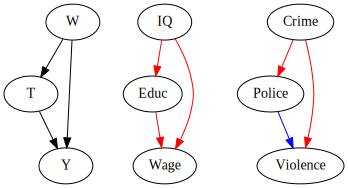

In [33]:
g = gr.Digraph()

g.edge("W", "T"), g.edge("W", "Y"), g.edge("T", "Y")

g.edge("IQ", "Educ", color="red"), g.edge("IQ", "Wage", color="red"), g.edge("Educ", "Wage", color="red")

g.edge("Crime", "Police", color="red"), g.edge("Crime", "Violence", color="red"), 
g.edge("Police", "Violence", color="blue")

g

Đồ thị nhân quả rất hữu dụng khi dùng để mô tả sự hiểu biết của ta về thế giới và hiểu cách thiên lệch nhiễu hoạt động. Trong ví dụ đầu tiên, chúng ta có một biểu đồ mà giáo dục chi phối tiền lương: học nhiều hơn dẫn đến việc lương cao hơn. Tuy nhiên, chỉ số IQ cũng chi phối tiền lương và cả giáo dục nữa: chỉ số IQ cao làm tăng cả học vấn và tiền lương. Vì vậy, nếu chúng ta không tính đến chỉ số IQ trong mô hình của mình, một số tác động của nó đối với tiền lương sẽ chuyển thành mối tương quan với trình độ học vấn. Điều đó sẽ làm cho tác động của giáo dục trông có vẻ lớn hơn so với thực tế. Đây là một ví dụ về thiên lệch dương.

Một ví dụ khác nhưng lại về thiên lệch âm, hãy xem xét đồ thị nhân quả về tác động của cảnh sát đối với vấn đề bạo lực trong thành phố. Chúng ta thường thấy trên thế giới các thành phố có lực lượng cảnh sát dày đặc hơn thì cũng xảy ra nhiều vấn đề bạo lực hơn. Liệu có phải cảnh sát đang gây ra bạo lực không? Chà, cũng có thể lắm chứ, nhưng không nghĩ nó đáng để ta đưa vào cuộc thảo luận này ngay tại đây. Tuy nhiên, cũng có nhiều khả năng có một biến nhiễu khiến chúng ta nhìn thấy một phiên bản bị thiên lệch về tác động của cảnh sát đối với bạo lực. Có thể là việc tăng lực lượng cảnh sát sẽ giảm bớt bạo lực. Nhưng, một biến thứ ba là tội phạm, tác động cùng chiều với cả bạo lực và lực lượng cảnh sát. Nếu chúng ta không tính đến nó, tác động của tội phạm đối với bạo lực sẽ bị tính cho lực lượng cảnh sát, khiến cho việc gia tăng lực lượng cảnh sát có vẻ như đang làm gia tăng bạo lực. Đây là một ví dụ về thiên lệch âm.

Đồ thị nhân quả cũng có thể cho chúng ta thấy làm thế nào mà cả hai phương pháp hồi quy và thử nghiệm ngẫu nhiên có đối chứng đều dùng được cho thiên lệch nhiễu. RCT cắt đứt sự kết nối của biến nhiễu với biến can thiệp. Theo định nghĩa, bằng cách làm cho \\(T\\) ngẫu nhiên thì không gì có thể gây ra thiên lệch nhiễu.

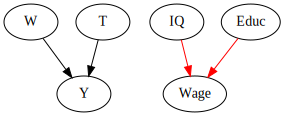

In [34]:
g = gr.Digraph()

g.edge("W", "Y"), g.edge("T", "Y")

g.edge("IQ", "Wage", color="red"), g.edge("Educ", "Wage", color="red")

g

Mặt khác, hồi quy so sánh tác động của \\(T\\) trong khi cố định các biến biến nhiễu \\(W\\). Đối với hồi quy, không có trường hợp W ngừng gây ra T và Y. Mà chỉ là nó được giữ cố định, vì vậy nó không thể tác động đến những thay đổi trên T và Y.

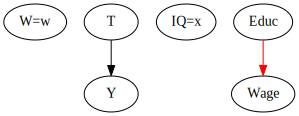

In [35]:
g = gr.Digraph()

g.node("W=w"), g.edge("T", "Y")
g.node("IQ=x"), g.edge("Educ", "Wage", color="red")

g

Bây giờ, hãy trở lại với câu hỏi của chúng ta, liệu có phải tham số mà chúng ta đã ước lượng về tác động của biến `educ` đối với mức lương là quan hệ nhân quả hay không? Điều đó sẽ phụ thuộc vào khả năng liệu tất cả các biến nhiễu đã được đưa vào mô hình hay chưa. Cá nhân tôi nghĩ là chưa. Ví dụ, mô hình của chúng ta chưa bao gồm tài sản gia đình. Ngay cả khi chúng ta đưa vào biến trình độ học vấn của gia đình, đó chỉ có thể được coi là một đại diện cho sự giàu có của gia đình. Chúng tôi cũng không tính đến các yếu tố như tham vọng cá nhân. Có thể tham vọng chính là nguyên nhân dẫn đến cả việc học nhiều năm hơn và lương cao hơn, vì vậy nó là một biến nhiễu. Điều này cho thấy rằng **suy luận nhân quả với dữ liệu không ngẫu nhiên hoặc dữ liệu quan sát nên luôn được thực hiện với một chút cẩn trọng**. Chúng ta không bao giờ có thể chắc chắn được rằng tất cả các biến nhiễu đã được tính đến.

# Ý tưởng chủ đạo

Chúng ta đã đề cập đến khá nhiều kiến thức về hồi quy. Chúng ta đã thấy cách mà hồi quy có thể được sử dụng để thực hiện A/B testing và dễ dàng cung cấp cho ta các thông số của khoảng tin cậy. Sau đó, chúng ta đã chuyển sang nghiên cứu cách mà hồi quy giải quyết vấn đề dự đoán và nó là phép xấp xỉ tuyến tính tốt nhất cho CEF. Chúng ta cũng đã thảo luận về làm cách nào mà hệ số can thiệp hồi quy là hiệp phương sai giữa sự can thiệp và kết quả chia cho phương sai của sự can thiệp, trong trường hợp mô hình hồi quy đơn biến. Đối với trường hợp hồi quy đa biến, chúng ta đã tìm ra cách mà hồi quy cho chúng ta cách giải thích phần nào về hệ số can thiệp: nó có thể được diễn giải là cách mà kết quả sẽ thay đổi khi ta thay đổi sự can thiệp trong khi giữ cho tất cả các biến khác trong mô hình không đổi. Đây là điều mà các chuyên gia kinh tế gọi là ceteris paribus theo ngôn ngữ La-tinh.

Cuối cùng, chúng ta chuyển sang tìm hiểu sự thiên lệch. Chúng ta đã thấy làm thế nào mà `Hồi quy thiếu bằng hồi quy đủ cộng với tác động của biến thiếu nhân với hồi quy của biến thiếu trên các biến được đưa vào mô hình`. Điều này làm sáng tỏ cách mà thiên lệch hình thành. Chúng ta phát hiện ra rằng nguồn gốc của thiên lệch thiếu biến là nhiễu: một biến ảnh hưởng đến cả sự can thiệp và kết quả. Cuối cùng, chúng ta đã sử dụng các đồ thị nhân quả để xem cách mà RCT và hồi quy khắc phục nhiễu.

## Tài liệu tham khảo

Tôi muốn dành loạt bài viết này để vinh danh Joshua Angrist, Alberto Abadie and Christopher Walters vì khóa học Kinh tế lượng tuyệt cú mèo của họ. Phần lớn ý tưởng trong loạt bài này được lấy từ các bài giảng của họ được tổ chức bởi Hiệp hội Kinh tế Mĩ.  Theo dõi các bài giảng này là những gì tôi làm trong suốt năm 2020 khó nhằn.
* [Kinh tế lượng với dữ liệu chéo](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Luyện chưởng Kinh tế lượng Gần như Vô hại](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Tôi cũng muốn giới thiệu cuốn sách lý thú của Angrist. Chúng cho tôi thấy Kinh tế lượng, hoặc 'Lượng theo cách họ gọi không chỉ vô cùng hữu ích mà còn rất vui.

* [Kinh tế lượng Gần như Vô hại](https://www.mostlyharmlesseconometrics.com/)
* [Luyện chưởng 'Lượng](https://www.masteringmetrics.com/)

Tài liệu tham khảo cuối cùng của tôi là cuốn sách của Miguel Hernan and Jamie Robins. Nó là người bạn đồng hành tin cậy với tôi khi trả lời những câu hỏi nhân quả khó nhằn.

* [Sách Suy Luận Nhân Quả](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

# Bảng Từ Viết tắt 
|Viết tắt| Tiếng Anh | Tiếng Việt |
| --- | --- | --- | 
|ATE|Average Treatment Effect|Tác động Can thiệp Trung bình| 
|CEF|Conditional Expectation Function|Hàm Kì vọng có Điều kiện| 
|RCT|Randomized Controlled Trial|Thử nghiệm Ngẫu nhiên Đối chứng| 


# Bảng Thuật ngữ 
| Thuật ngữ | Tiếng Anh |
| --- | --- | 
|biến|variable| 
|biến bổ trợ|auxiliary variable| 
|biến can thiệp|treatment variable| 
|biến giả|dummy, dummy variable| 
|biến giải thích|covariate| 
|biến hồi quy|regressor| 
|biến nhiễu|confounder, confounding variable| 
|biến phụ thuộc|dependent variable| 
|biến thiếu|omitted variables, omitted variable| 
|code|code| 
|có tương quan|correlated| 
|dữ liệu không ngẫu nhiên|non-random data| 
|dữ liệu quan sát|observational data| 
|giá trị trung bình|mean| 
|hiệp phương sai|covariance| 
|hàm kiểm định a/b|a/b testing function| 
|hệ số can thiệp hồi quy|regression treatment coefficient| 
|hệ số chặn|intercept| 
|hệ số góc|coefficient| 
|hồi quy|regression, regress| 
|hồi quy tuyến tính|linear regression| 
|hồi quy đa biến|multivariate regression| 
|khoảng tin cậy|confidence interval| 
|kết quả tiềm năng|potential outcome| 
|nhiễu|confounding| 
|nhóm được can thiệp|treatment group, test group| 
|phép xấp xỉ tuyến tính|linear approximation| 
|phương sai|variance| 
|phần dư|error term, residual| 
|quan hệ tương quan|association, correlation| 
|suy luận nhân quả|causal inference, causal reasoning| 
|tham số|parameter| 
|thiên lệch|bias| 
|thiên lệch dương|positive bias| 
|thiên lệch nhiễu|confounding bias, confouding bias| 
|thiên lệch thiếu biến|omitted variable bias| 
|thiên lệch âm|negative bias| 
|thử nghiệm ngẫu nhiên|randomised trial| 
|thử nghiệm ngẫu nhiên có đối chứng|randomised controlled trial| 
|trung bình của mẫu|sample mean| 
|trị số p|p-value| 
|tác động can thiệp|treatment effect, treatment impact| 
|tác động can thiệp trung bình|average treatment effect| 
|tác động dương|positive effect| 
|tác động nhân quả trung bình|average causal effect| 
|được can thiệp|treated| 
|đối chứng|untreated, non-treated| 
|ước lượng hệ số|parameter estimate| 
|ước lượng quá|overestimate| 
